# MaskRCNN Road Damage Detection

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/MaskRCNN-Object-Detection-and-Segmentation/blob/master/MaskRCNN%20Microcontroller%20Detection.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/MaskRCNN-Object-Detection-and-Segmentation/blob/master/MaskRCNN%20Microcontroller%20Detection.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Install Matterport Mask-RCNN in Google Colab

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip3 uninstall -y keras
!pip3 install keras==2.1.0

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 307kB 5.3MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN
!pip3 install -r requirements.txt
!python3 setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (562/562), done.
/content/Mask_RCNN
     |████████████████████████████████| 204kB 4.0MB/s 
     |████████████████████████████████| 163kB 6.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=07cda4f462a9aec070689ad0e8cd2cac56319d381dfb800ae3775fe7eef496ae
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.tx

In [4]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Mask_RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Mask_RCNN/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.

## Imports

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from os import listdir
%load_ext tensorboard
import tensorflow as tf
from os import listdir
from numpy import zeros
from numpy import asarray
import datetime
import glob

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
#MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_DIR = '/content/drive/MyDrive/maskrcnn_orig'

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Using TensorFlow backend.


... done downloading pretrained model!


## Configurations

## Dataset

In [7]:
!mkdir data

In [8]:
%cd data

/content/Mask_RCNN/data


In [9]:
!unzip /content/drive/MyDrive/rdd_voc_orig.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/Japan_010099_jpg.rf.0344e186170be4a09a83a553540051ce.xml  
 extracting: train/Japan_010100_jpg.rf.7f823ddc07c0dbda27ff00cb532f99cd.jpg  
 extracting: train/Japan_010100_jpg.rf.7f823ddc07c0dbda27ff00cb532f99cd.xml  
 extracting: train/Japan_010102_jpg.rf.12f60913892fd3720d284a828e4de9dd.jpg  
 extracting: train/Japan_010102_jpg.rf.12f60913892fd3720d284a828e4de9dd.xml  
 extracting: train/Japan_010103_jpg.rf.992f63a109c3b39ad1069a5cc714f977.jpg  
 extracting: train/Japan_010103_jpg.rf.992f63a109c3b39ad1069a5cc714f977.xml  
 extracting: train/Japan_010105_jpg.rf.634105d1f420c713cb22268f84c7b7a8.jpg  
 extracting: train/Japan_010105_jpg.rf.634105d1f420c713cb22268f84c7b7a8.xml  
 extracting: train/Japan_010107_jpg.rf.3eefc01da5322ac4915a8a01228e41dc.jpg  
 extracting: train/Japan_010107_jpg.rf.3eefc01da5322ac4915a8a01228e41dc.xml  
 extracting: train/Japan_010108_jpg.rf.3b040a09577c6fe2c0591b66093d9845.jpg  
 extracting: 

In [10]:
!mkdir train/images
!mkdir test/images
!mkdir valid/images
!mkdir train/annotations
!mkdir test/annotations
!mkdir valid/annotations

In [11]:
!mkdir -p Japan/test/images
!mkdir -p Japan/test/annotations
!mkdir -p India/test/images
!mkdir -p India/test/annotations
!mkdir -p Czech/test/images
!mkdir -p Czech/test/annotations

In [12]:
!cp test/Japan*.jpg Japan/test/images
!cp test/Japan*.xml Japan/test/annotations
!cp test/India*.jpg India/test/images
!cp test/India*.xml India/test/annotations
!cp test/Czech*.jpg Czech/test/images
!cp test/Czech*.xml Czech/test/annotations

In [13]:
!mv train/*.jpg train/images
!mv train/*.xml train/annotations
!mv valid/*.jpg valid/images
!mv valid/*.xml valid/annotations
!mv test/*.jpg test/images
!mv test/*.xml test/annotations

In [14]:
%cd ..

/content/Mask_RCNN


In [15]:
class RoadDamageDataset(utils.Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        
        # Add classes. We have only one class to add.
        self.add_class("dataset", 1, "D00")
        self.add_class("dataset", 2, "D10")
        self.add_class("dataset", 3, "D20")
        self.add_class("dataset", 4, "D40")
        
        # define data locations for images and annotations
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annotations/'
        
        # Iterate through all files in the folder to 
        #add class, images and annotaions
        for filename in listdir(images_dir):
            
            # extract image id
            image_id = filename[:-4]
            
            # skip bad images
            ##if image_id in ['00090']:
            #    continue
            # skip all images after 150 if we are building the train set
            #if is_train and int(image_id) >= 150:
            #    continue
            # skip all images before 150 if we are building the test/val set
            #if not is_train and int(image_id) < 150:
            #    continue
            
            # setting image file
            img_path = images_dir + filename
            
            # setting annotations file
            ann_path = annotations_dir + image_id + '.xml'
            
            # adding images and annotations to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path, class_ids=[0,1,2,3,4])

    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        
        # load and parse the file
        tree = ET.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

    # load the masks for an image
    """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
     """
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        
        # define anntation  file location
        path = info['annotation']
        
        # load XML
        boxes, w, h = self.extract_boxes(path)
       
        # create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        
        # create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            if i ==0:
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('D00'))
            elif i ==1:
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('D10'))
            elif i ==2:
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('D20'))
            else:
                masks[row_s:row_e, col_s:col_e, i] = 4
                class_ids.append(self.class_names.index('D40'))
        return masks, asarray(class_ids, dtype='int32')

    # load an image reference
    #Return the path of the image."""
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        print(info)
        return info['path']

In [16]:
# Create training and validation set
# train set
dataset_train = RoadDamageDataset()
dataset_train.load_dataset('data/train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))
 
# val set
dataset_val = RoadDamageDataset()
dataset_val.load_dataset('data/valid')
dataset_val.prepare()
print('Validation: %d' % len(dataset_val.image_ids))

Train: 10152
Validation: 1026


In [17]:
# test set
dataset_test = RoadDamageDataset()
dataset_test.load_dataset('data/test')
dataset_test.prepare()
print('Test: %d' % len(dataset_test.image_ids))

Test: 1017


In [18]:
# Japan test set
dataset_japan = RoadDamageDataset()
dataset_japan.load_dataset('data/Japan/test')
dataset_japan.prepare()
print('Test: %d' % len(dataset_japan.image_ids))

Test: 655


In [19]:
# India test set
dataset_india = RoadDamageDataset()
dataset_india.load_dataset('data/India/test')
dataset_india.prepare()
print('Test: %d' % len(dataset_india.image_ids))

Test: 276


In [20]:
# Czech test set
dataset_czech = RoadDamageDataset()
dataset_czech.load_dataset('data/Czech/test')
dataset_czech.prepare()
print('Test: %d' % len(dataset_czech.image_ids))

Test: 86


In [21]:
from os import listdir
from numpy import zeros
from numpy import asarray
import datetime

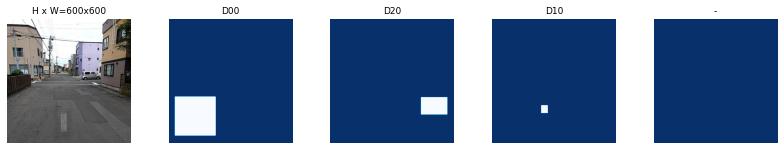

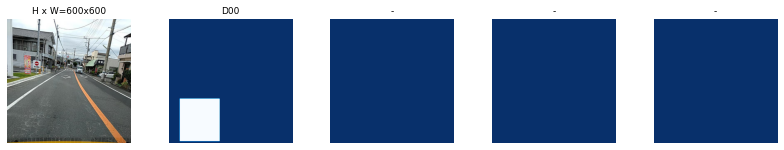

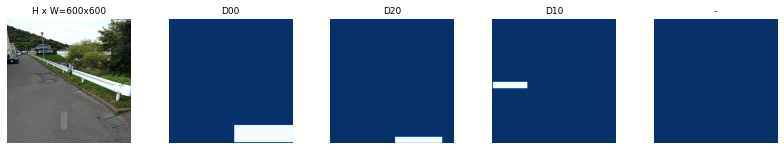

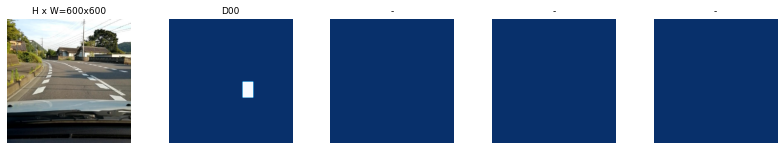

In [22]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

## Create Model

In [23]:
#inherting  from Config class

class RDDConfig(Config):
    # give the configuration a recognizable name
    NAME = "RDD"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
 
    # number of classes (we would normally add +1 for the background)
    NUM_CLASSES = 4 + 1
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 2500
    
    # Learning rate
    LEARNING_RATE=0.0001
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.1
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=6
    
    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
    BACKBONE = "resnet50"
    
    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32)  # anchor side in pixels
    
    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 500

config = RDDConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

## Training

In [26]:
  %load_ext tensorboard
  logdir = os.path.join(MODEL_DIR, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [27]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE,
            epochs=25,            
            layers='heads')


Starting at epoch 0. LR=0.0001

Checkpoint Path: /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/25
2499/2500 [============================>.] - ETA: 0s - loss: 7.8098 - rpn_class_loss: 0.1016 - rpn_bbox_loss: 6.3314 - mrcnn_class_loss: 0.3178 - mrcnn_bbox_loss: 0.6113 - mrcnn_mask_loss: 0.4478

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



2500/2500 [==============================] - 785s 314ms/step - loss: 7.8115 - rpn_class_loss: 0.1015 - rpn_bbox_loss: 6.3333 - mrcnn_class_loss: 0.3177 - mrcnn_bbox_loss: 0.6113 - mrcnn_mask_loss: 0.4477 - val_loss: 7.3703 - val_rpn_class_loss: 0.0672 - val_rpn_bbox_loss: 5.9610 - val_mrcnn_class_loss: 0.3317 - val_mrcnn_bbox_loss: 0.5831 - val_mrcnn_mask_loss: 0.4271
Epoch 2/25
2500/2500 [==============================] - 745s 298ms/step - loss: 7.2432 - rpn_class_loss: 0.0605 - rpn_bbox_loss: 5.8743 - mrcnn_class_loss: 0.3200 - mrcnn_bbox_loss: 0.5621 - mrcnn_mask_loss: 0.4262 - val_loss: 7.0290 - val_rpn_class_loss: 0.0562 - val_rpn_bbox_loss: 5.7203 - val_mrcnn_class_loss: 0.3156 - val_mrcnn_bbox_loss: 0.5175 - val_mrcnn_mask_loss: 0.4194
Epoch 3/25
2500/2500 [==============================] - 746s 299ms/step - loss: 7.0350 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 5.7151 - mrcnn_class_loss: 0.3153 - mrcnn_bbox_loss: 0.5348 - mrcnn_mask_loss: 0.4158 - val_loss: 6.9154 - val_rpn_cl

In [28]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=10, 
            layers="all")


Starting at epoch 25. LR=1e-05

Checkpoint Path: /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers 

## Detection

In [24]:
class InferenceConfig(RDDConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0025.h5






Re-starting from epoch 25


In [25]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max:  600.00000  float64
gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:  171.00000  max:  480.00000  int32
gt_mask                  shape: (512, 512, 2)         min:    0.00000  max:    2.00000  uint8


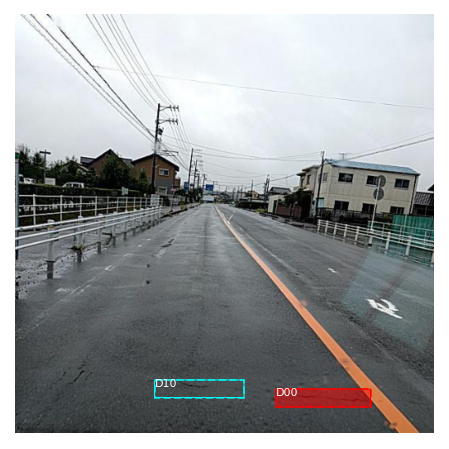

In [26]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 64512, 4)         min:   -0.04428  max:    1.01297  float32


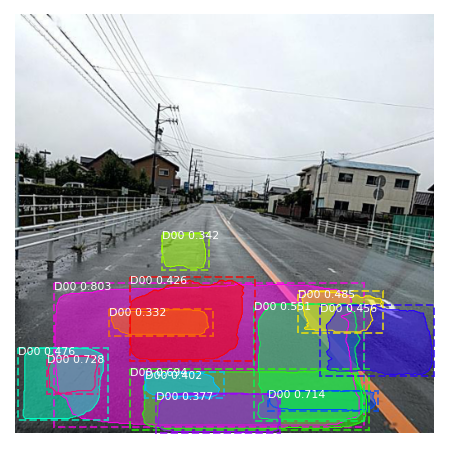

In [27]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

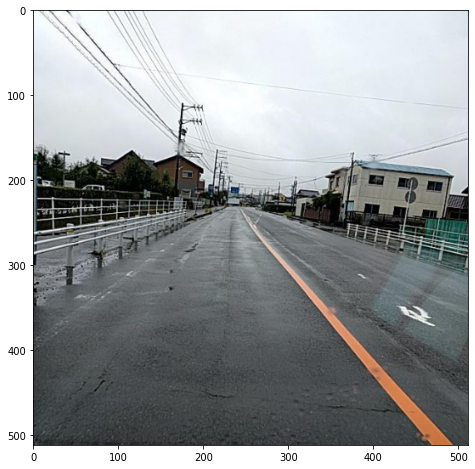

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(original_image)

## Evaluation

In [26]:
import glob

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
def rcnn_batch_eval(image_ids):
    APs = []
    F1s = []
    p_li = []
    r_li = []
    for image_id in image_ids:
          # Load image and ground truth data
          image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, inference_config,image_id, use_mini_mask=False)
          molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
          # Run object detection
          results = model.detect([image], verbose=0)
          r = results[0]
          # Compute AP
          AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,r["rois"], r["class_ids"], r["scores"], r['masks'])
          #AP = 1 - AP
          APs.append(AP)
          p_li.append(np.mean(precisions))
          r_li.append(np.mean(recalls))
          # Compute F1 score
          F1s.append(2*((np.mean(precisions) * np.mean(recalls)) / (np.mean(precisions) + np.mean(recalls))))
          

    return APs, precisions, recalls, F1s,p_li,r_li

Loading weights from  /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5
Re-starting from epoch 22
mAP:  0.2933440175876662
Len of Precisions 1026
Precision 0.21756759546303536
Recalls 0.375967187358451
F1 Score:  0.24586986548828665


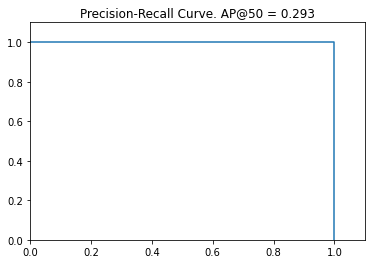

In [33]:
image_ids = dataset_val.image_ids

weights_li = glob.glob('/content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5')

for i in weights_li:

  print("Loading weights from ", i)
  model.load_weights(i, by_name=True)
  APs, precisions, recalls, F1s,p_li, r_li = rcnn_batch_eval(image_ids)
  print("mAP: ", np.mean(APs))
  print("Len of Precisions", len(p_li))
  print("Precision", np.mean(p_li))
  print("Recalls", np.mean(r_li))
  print("F1 Score: ", np.mean(F1s))
  visualize.plot_precision_recall(np.mean(APs), precisions, recalls)
  

Loading weights from  /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5
Re-starting from epoch 22
mAP:  0.29283795490362885
Len of Precisions 1017
Precision 0.2168459090000106
Recalls 0.375502833674751
F1 Score:  0.24517839765934807


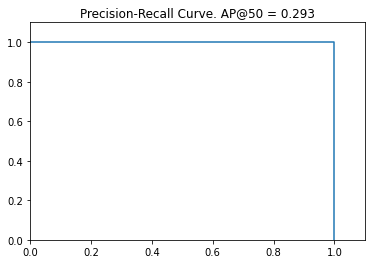

In [34]:
image_ids = dataset_test.image_ids

weights_li = glob.glob('/content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5')

for i in weights_li:

  print("Loading weights from ", i)
  model.load_weights(i, by_name=True)
  APs, precisions, recalls, F1s,p_li, r_li = rcnn_batch_eval(image_ids)
  print("mAP: ", np.mean(APs))
  print("Len of Precisions", len(p_li))
  print("Precision", np.mean(p_li))
  print("Recalls", np.mean(r_li))
  print("F1 Score: ", np.mean(F1s))
  visualize.plot_precision_recall(np.mean(APs), precisions, recalls)

Loading weights from  /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5
Re-starting from epoch 22
mAP:  0.2864639820929088
Len of Precisions 655
Precision 0.2158327017953625
Recalls 0.37399762323967056
F1 Score:  0.24436050516072366


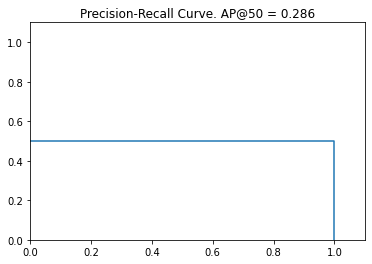

In [35]:
image_ids = dataset_japan.image_ids

weights_li = glob.glob('/content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5')

for i in weights_li:

  print("Loading weights from ", i)
  model.load_weights(i, by_name=True)
  APs, precisions, recalls, F1s,p_li, r_li = rcnn_batch_eval(image_ids)
  print("mAP: ", np.mean(APs))
  print("Len of Precisions", len(p_li))
  print("Precision", np.mean(p_li))
  print("Recalls", np.mean(r_li))
  print("F1 Score: ", np.mean(F1s))
  visualize.plot_precision_recall(np.mean(APs), precisions, recalls)

Loading weights from  /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5
Re-starting from epoch 22
mAP:  0.31743862362069036
Len of Precisions 276
Precision 0.2334949002872463
Recalls 0.397985624136205
F1 Score:  0.2647037872489468


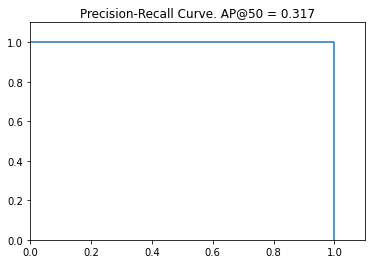

In [36]:
image_ids = dataset_india.image_ids

weights_li = glob.glob('/content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5')

for i in weights_li:

  print("Loading weights from ", i)
  model.load_weights(i, by_name=True)
  APs, precisions, recalls, F1s,p_li, r_li = rcnn_batch_eval(image_ids)
  print("mAP: ", np.mean(APs))
  print("Len of Precisions", len(p_li))
  print("Precision", np.mean(p_li))
  print("Recalls", np.mean(r_li))
  print("F1 Score: ", np.mean(F1s))
  visualize.plot_precision_recall(np.mean(APs), precisions, recalls)

Loading weights from  /content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5
Re-starting from epoch 22
mAP:  0.25763565959163415
Len of Precisions 86
Precision 0.20604310888831237
Recalls 0.36945387514892564
F1 Score:  0.2332143531469166


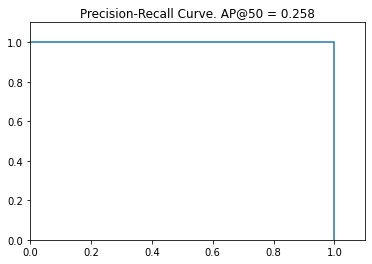

In [37]:
image_ids = dataset_czech.image_ids

weights_li = glob.glob('/content/drive/MyDrive/maskrcnn_orig/rdd20210303T0720/mask_rcnn_rdd_0022.h5')

for i in weights_li:

  print("Loading weights from ", i)
  model.load_weights(i, by_name=True)
  APs, precisions, recalls, F1s,p_li, r_li = rcnn_batch_eval(image_ids)
  print("mAP: ", np.mean(APs))
  print("Len of Precisions", len(p_li))
  print("Precision", np.mean(p_li))
  print("Recalls", np.mean(r_li))
  print("F1 Score: ", np.mean(F1s))
  visualize.plot_precision_recall(np.mean(APs), precisions, recalls)